<a href="https://colab.research.google.com/github/NsikakMenim/Data-Analysis-Portfolio/blob/main/google_apple_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Googlestore and AppleStore data cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Data visualization
import warnings
warnings.filterwarnings('ignore')  # Ignores warning messages

In [ ]:
import pandas as pd
# Install gdown if it's not already installed
!pip install gdown

# Use gdown to download the file using its ID
!gdown --id 10ZU9jbVaq1IoA1amgrRs_V0qP4mL67lB


df = pd.read_csv('/content/Google-Playstore.csv')
df.head()


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

,0
App Name,5
App Id,0
Category,0
Rating,22883
Rating Count,22883
Installs,107
Minimum Installs,107
Maximum Installs,0
Free,0
Price,0


In [ ]:
df.head()

In [ ]:
# Convert to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Released'] = pd.to_datetime(df['Released'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   App Name           object        
 1   App Id             object        
 2   Category           object        
 3   Rating             float64       
 4   Rating Count       float64       
 5   Installs           object        
 6   Minimum Installs   float64       
 7   Maximum Installs   int64         
 8   Free               bool          
 9   Price              float64       
 10  Currency           object        
 11  Size               object        
 12  Minimum Android    object        
 13  Developer Id       object        
 14  Developer Website  object        
 15  Developer Email    object        
 16  Released           datetime64[ns]
 17  Last Updated       datetime64[ns]
 18  Content Rating     object        
 19  Privacy Policy     object        
 20  Ad Supported       bool 

In [ ]:
df.head(2)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35


In [ ]:
#selecting the columns we need
subset_columns = [
    "App Id",
    "App Name",
    "Category",
    "Rating",
    "Rating Count",
    "Maximum Installs",
    "Last Updated",
    "Editors Choice",
    "Content Rating",
    "Free",
    "Price",
    "Ad Supported",
    "In App Purchases",
    "Released",
    "Size"
]

In [ ]:
df1=df[subset_columns]
df1.head(2)

,App Id,App Name,Category,Rating,Rating Count,Maximum Installs,Last Updated,Editors Choice,Content Rating,Free,Price,Ad Supported,In App Purchases,Released,Size
0,com.ishakwe.gakondo,Gakondo,Adventure,0.0,0.0,15,2020-02-26,False,Everyone,True,0.0,False,False,2020-02-26,10M
1,com.webserveis.batteryinfo,Ampere Battery Info,Tools,4.4,64.0,7662,2021-05-06,False,Everyone,True,0.0,True,False,2020-05-21,2.9M


In [ ]:
df1.isnull().sum()

,0
App Id,0
App Name,5
Category,0
Rating,22883
Rating Count,22883
Maximum Installs,0
Last Updated,0
Editors Choice,0
Content Rating,0
Free,0


In [ ]:
# Droping rows with missing App Name
df1 = df1.dropna(subset=['App Name'])
df1.isnull().sum()

,0
App Id,0
App Name,0
Category,0
Rating,22883
Rating Count,22883
Maximum Installs,0
Last Updated,0
Editors Choice,0
Content Rating,0
Free,0


In [ ]:
# Impute Rating with the min value
df1.loc[:, 'Rating'] = df1['Rating'].fillna(df1['Rating'].min())

# Impute Rating Count with min value
df1.loc[:, 'Rating Count'] = df1['Rating Count'].fillna(df1['Rating Count'].min())
df1.isnull().sum()

,0
App Id,0
App Name,0
Category,0
Rating,0
Rating Count,0
Maximum Installs,0
Last Updated,0
Editors Choice,0
Content Rating,0
Free,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312939 entries, 0 to 2312943
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App Id            object        
 1   App Name          object        
 2   Category          object        
 3   Rating            float64       
 4   Rating Count      float64       
 5   Maximum Installs  int64         
 6   Last Updated      datetime64[ns]
 7   Editors Choice    bool          
 8   Content Rating    object        
 9   Free              bool          
 10  Price             float64       
 11  Ad Supported      bool          
 12  In App Purchases  bool          
 13  Released          datetime64[ns]
 14  Size              object        
dtypes: bool(4), datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 220.6+ MB


In [ ]:
# Calculate the average delta (in days) for apps with both Released and Last Updated
df1['Update_Delta'] = (df1['Last Updated'] - df1['Released']).dt.days
average_delta = df1['Update_Delta'].mean()

# Impute missing Released using Last Updated minus the average delta
df1.loc[df1['Released'].isna(), 'Released'] = df1['Last Updated'] - pd.Timedelta(days=average_delta)

# Drop the temporary Update_Delta column
df1.drop('Update_Delta', axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312939 entries, 0 to 2312943
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App Id            object        
 1   App Name          object        
 2   Category          object        
 3   Rating            float64       
 4   Rating Count      float64       
 5   Maximum Installs  int64         
 6   Last Updated      datetime64[ns]
 7   Editors Choice    bool          
 8   Content Rating    object        
 9   Free              bool          
 10  Price             float64       
 11  Ad Supported      bool          
 12  In App Purchases  bool          
 13  Released          datetime64[ns]
 14  Size              object        
dtypes: bool(4), datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 285.1+ MB


In [ ]:
# Droping rows with missing size
df1 = df1.dropna(subset=['Size'])
df1.isnull().sum()

,0
App Id,0
App Name,0
Category,0
Rating,0
Rating Count,0
Maximum Installs,0
Last Updated,0
Editors Choice,0
Content Rating,0
Free,0


## HANDLING OUTLIERS

<Figure size 1200x600 with 0 Axes>

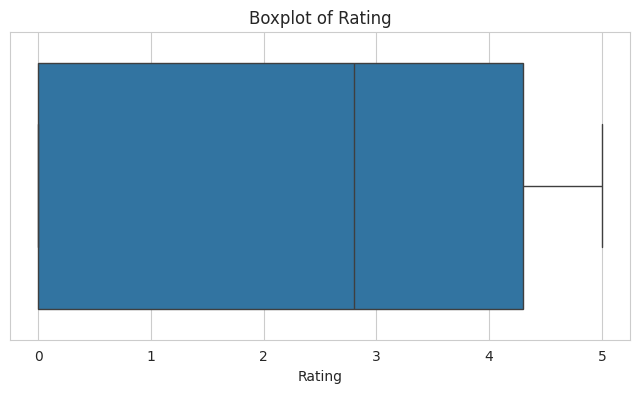

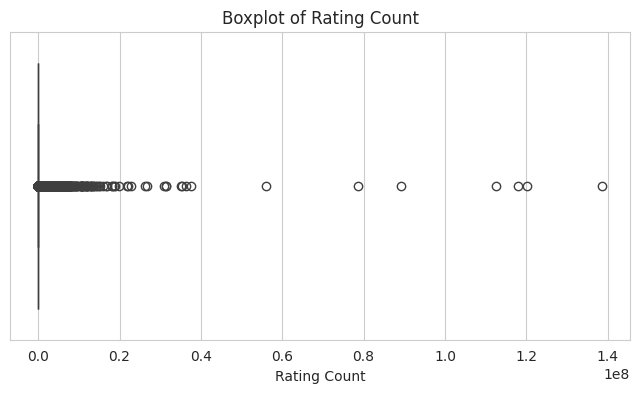

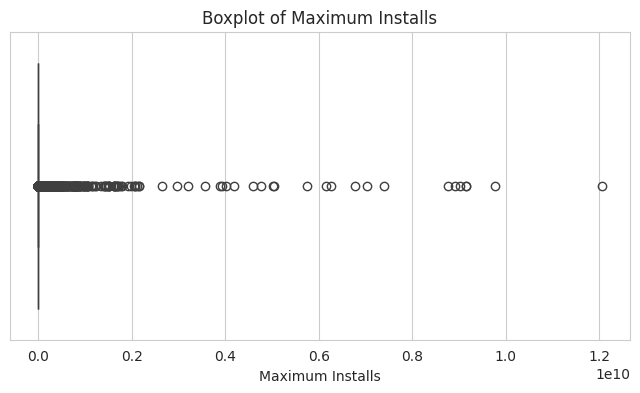

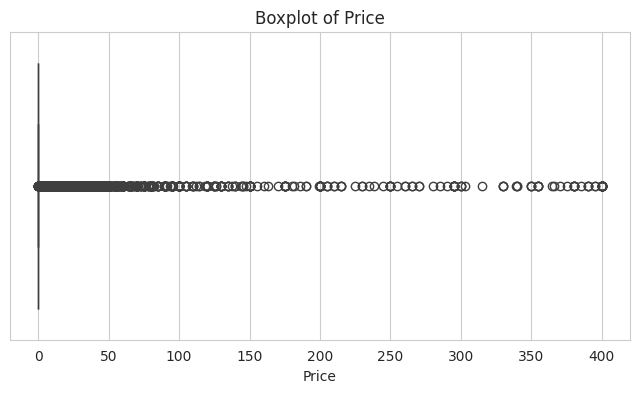

In [ ]:
#USING BOX PLOT TO CHECK FOR OUTLIERS
# Set figure size for better visualization
plt.figure(figsize=(12, 6))

# Select numerical columns for boxplot
numeric_columns = df1.select_dtypes(include=['number']).columns

# Create multiple boxplots for numerical features
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

***GIVEN THAT MOST APPS ARE FREE OUTLIERS IN COLUMNS LIKE PRICE ARE NOT ACTUALLY OUTLIERS BUT TRUE VALUES THAT REPRESENTS THE DATA CORRECTLY***

***DUE TO POPULARITY COLUMNS LIKE MAX INSTALLS AND RATING COUNT WOULD HAIH FIGURE THAT CAN BE SEEN AS OUTLIERS IN PYTHON BUT THEY ARE ACTUALLY NOT OUTLIERS AND THEY CORRECTLY REPRESENT THE DATA***

In [ ]:
# Checking for outliers in Rating count, Price, Max installs
# Identify numerical features for outlier detection
numerical_features = ['Rating Count', 'Price', 'Maximum Installs']

# Loop through numerical features and detect outliers using IQR
for feature in numerical_features:
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df1[(df1[feature] < lower_bound) | (df1[feature] > upper_bound)]
    print(f"Outliers in {feature}:\n{outliers[[feature]]}\n")

Outliers in Rating Count:
         Rating Count
9               820.0
12              118.0
14             1572.0
18              328.0
22              211.0
...               ...
2312913        1687.0
2312931        1002.0
2312932      103466.0
2312933         344.0
2312939       16775.0

[394682 rows x 1 columns]

Outliers in Price:
         Price
273       1.99
296       4.99
417       0.99
554       2.99
618       0.99
...        ...
2312658   1.99
2312686   1.49
2312703   7.99
2312803   0.99
2312927   2.49

[44932 rows x 1 columns]

Outliers in Maximum Installs:
         Maximum Installs
9                   62433
12                  37763
14                  42856
18                  31235
23                 646456
...                   ...
2312918             20415
2312931            590469
2312932           7274660
2312933            814548
2312939            337109

[407643 rows x 1 columns]



In [ ]:
# Grouping price into two categories: =0 and >0
df1['Price_Group'] = df1['Price'].apply(lambda x: 0 if x == 0 else 1)

# Calculate the sum of occurrences for each group
price_group_counts = df1.groupby('Price_Group')['Price_Group'].count()

price_group_counts

,Price_Group
Price_Group,
0,2267811
1,44932


In [ ]:
# Normalization of the data using log transformation for handling outliers in price, rating and max installs
df1['Price_2'] = np.log1p(df1['Price'])
df1['Rating_Count_2'] = np.log1p(df1['Rating Count'])  # log(1 + x) to avoid log(0)
df1['Max_Installs_2'] = np.log1p(df1['Maximum Installs'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312743 entries, 0 to 2312943
Data columns (total 19 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App Id            object        
 1   App Name          object        
 2   Category          object        
 3   Rating            float64       
 4   Rating Count      float64       
 5   Maximum Installs  int64         
 6   Last Updated      datetime64[ns]
 7   Editors Choice    bool          
 8   Content Rating    object        
 9   Free              bool          
 10  Price             float64       
 11  Ad Supported      bool          
 12  In App Purchases  bool          
 13  Released          datetime64[ns]
 14  Size              object        
 15  Price_Group       int64         
 16  Price_2           float64       
 17  Rating_Count_2    float64       
 18  Max_Installs_2    float64       
dtypes: bool(4), datetime64[ns](2), float64(6), int64(2), object(5)
memory usage: 291.1+ MB


In [ ]:
df1.drop('Price_Group', axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312743 entries, 0 to 2312943
Data columns (total 18 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App Id            object        
 1   App Name          object        
 2   Category          object        
 3   Rating            float64       
 4   Rating Count      float64       
 5   Maximum Installs  int64         
 6   Last Updated      datetime64[ns]
 7   Editors Choice    bool          
 8   Content Rating    object        
 9   Free              bool          
 10  Price             float64       
 11  Ad Supported      bool          
 12  In App Purchases  bool          
 13  Released          datetime64[ns]
 14  Size              object        
 15  Price_2           float64       
 16  Rating_Count_2    float64       
 17  Max_Installs_2    float64       
dtypes: bool(4), datetime64[ns](2), float64(6), int64(1), object(5)
memory usage: 273.5+ MB


In [ ]:
df1.shape

(2312743, 18)

In [ ]:
df1.describe()

,Rating,Rating Count,Maximum Installs,Last Updated,Price,Released,Price_2,Rating_Count_2,Max_Installs_2
count,2.312743e+06,2.312743e+06,2.312743e+06,2312743,2.312743e+06,2312743,2.312743e+06,2.312743e+06,2.312743e+06
mean,2.181536e+00,2.836742e+03,3.202287e+05,2019-12-05 18:39:08.067899136,1.035071e-01,2018-08-31 05:03:18.475994624,2.641338e-02,2.205289e+00,6.796892e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,2009-02-09 00:00:00,0.000000e+00,2007-11-07 10:24:10.408093896,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,8.400000e+01,2019-04-18 00:00:00,0.000000e+00,2017-07-11 00:00:00,0.000000e+00,0.000000e+00,4.442651e+00
50%,2.800000e+00,6.000000e+00,6.950000e+02,2020-05-16 00:00:00,0.000000e+00,2019-03-20 00:00:00,0.000000e+00,1.945910e+00,6.545350e+00
75%,4.300000e+00,4.100000e+01,7.355000e+03,2021-02-05 00:00:00,0.000000e+00,2020-04-04 00:00:00,0.000000e+00,3.737670e+00,8.903272e+00
max,5.000000e+00,1.385576e+08,1.205763e+10,2021-06-16 00:00:00,4.000000e+02,2021-06-16 00:00:00,5.993961e+00,1.874680e+01,2.321296e+01
std,2.107084e+00,2.111198e+05,2.355598e+07,NaN,2.633240e+00,NaN,2.133322e-01,2.569611e+00,3.161471e+00


In [ ]:
df1.nunique()

,0
App Id,2312743
App Name,2177785
Category,48
Rating,42
Rating Count,38482
Maximum Installs,251559
Last Updated,3918
Editors Choice,2
Content Rating,6
Free,2


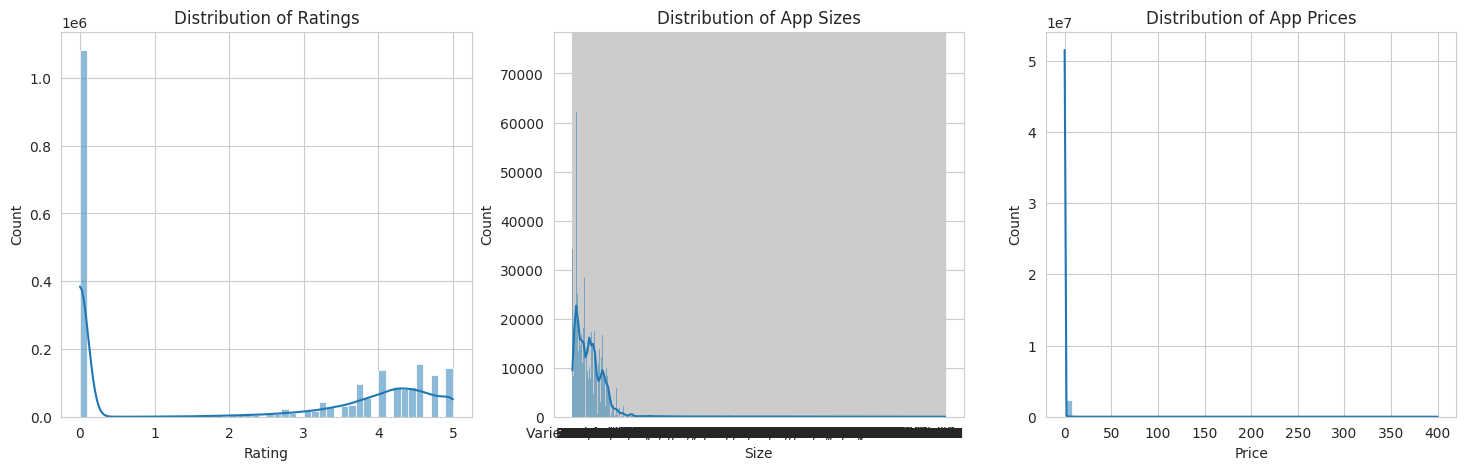

In [ ]:
# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Rating distribution
sns.histplot(df1["Rating"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Ratings")

# Size distribution
sns.histplot(df1["Size"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribution of App Sizes")

# Price distribution
sns.histplot(df1["Price"], bins=50, kde=True, ax=axes[2])
axes[2].set_title("Distribution of App Prices")

plt.show()

In [ ]:
# Count of apps per category
category_counts = df1["Category"].value_counts().head(10)

# Average rating per category
category_ratings = df1.groupby("Category")["Rating"].mean().sort_values(ascending=False).head(10)

print("Top 10 Categories by Number of Apps:\n", category_counts)
print("\nTop 10 Categories by Average Rating:\n", category_ratings)

Top 10 Categories by Number of Apps:
 Category
Education            241076
Music & Audio        154899
Tools                143976
Business             143761
Entertainment        138266
Lifestyle            118324
Books & Reference    116726
Personalization       89210
Health & Fitness      83501
Productivity          79686
Name: count, dtype: int64

Top 10 Categories by Average Rating:
 Category
Role Playing               3.257984
Casino                     3.253191
Simulation                 3.134605
Weather                    3.070766
Card                       3.034992
Racing                     2.907817
Video Players & Editors    2.885400
Word                       2.866767
Comics                     2.823864
Strategy                   2.781642
Name: Rating, dtype: float64


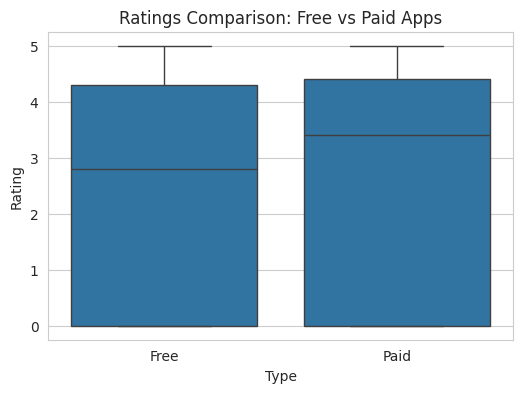

In [ ]:
# Categorizing apps as Free or Paid
df1["Type"] = df1["Price"].apply(lambda x: "Free" if x == 0 else "Paid")

# Boxplot of ratings by Type
plt.figure(figsize=(6, 4))
sns.boxplot(x="Type", y="Rating", data=df1)
plt.title("Ratings Comparison: Free vs Paid Apps")
plt.show()

# Apple dataset cleaning

In [ ]:
# Install kagglehub
!pip install kagglehub

import kagglehub
import os
import pandas as pd

# Download dataset
dataset_path = kagglehub.dataset_download("gauthamp10/apple-appstore-apps")

# List files in the dataset directory
print("Downloaded dataset files:", os.listdir(dataset_path))

# Look for CSV files in the dataset folder
csv_files = [f for f in os.listdir(dataset_path) if f.endswith(".csv")]

if csv_files:
    # Load the first CSV file found
    csv_path = os.path.join(dataset_path, csv_files[0])
    apple_df = pd.read_csv(csv_path)

    print("Dataset loaded successfully!")
    print(apple_df.head())  # Display first few rows
else:
    print("No CSV file found in the dataset folder.")


Downloaded dataset files: ['appleAppData.csv']
Dataset loaded successfully!
                             App_Id                 App_Name  \
0               com.hkbu.arc.apaper           A+ Paper Guide   
1               com.dmitriev.abooks                  A-Books   
2                    no.terp.abooks                  A-books   
3          fr.antoinettefleur.Book1              A-F Book #1   
4  com.imonstersoft.azdictionaryios  A-Z Synonyms Dictionary   

                                        AppStore_Url Primary_Genre  \
0  https://apps.apple.com/us/app/a-paper-guide/id...     Education   
1  https://apps.apple.com/us/app/a-books/id103157...          Book   
2  https://apps.apple.com/us/app/a-books/id145702...          Book   
3  https://apps.apple.com/us/app/a-f-book-1/id500...          Book   
4  https://apps.apple.com/us/app/a-z-synonyms-dic...     Reference   

  Content_Rating  Size_Bytes Required_IOS_Version              Released  \
0             4+  21993472.0               

In [ ]:
apple_df.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews'],
      dtype='object')

In [ ]:
apple_df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


In [ ]:
appstore_subset = ['App_Id', 'App_Name', 'Primary_Genre', 'Average_User_Rating', 'Size_Bytes', 'Price', 'Free']
apple_df2 = apple_df[appstore_subset]

In [ ]:
apple_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   App_Id               1230376 non-null  object 
 1   App_Name             1230375 non-null  object 
 2   Primary_Genre        1230376 non-null  object 
 3   Average_User_Rating  1230376 non-null  float64
 4   Size_Bytes           1230152 non-null  float64
 5   Price                1229886 non-null  float64
 6   Free                 1230376 non-null  bool   
dtypes: bool(1), float64(3), object(3)
memory usage: 57.5+ MB


In [ ]:
apple_df3 = apple_df2.rename(columns={'App_Id': 'App Id', 'App_Name': 'App Name', 'Primary_Genre': 'Category',
                                  'Average_User_Rating': 'Rating', 'Size_Bytes': 'Size'})
apple_df3.head()

,App Id,App Name,Category,Rating,Size,Price,Free
0,com.hkbu.arc.apaper,A+ Paper Guide,Education,0.0,21993472.0,0.00,True
1,com.dmitriev.abooks,A-Books,Book,5.0,13135872.0,0.00,True
2,no.terp.abooks,A-books,Book,0.0,21943296.0,0.00,True
3,fr.antoinettefleur.Book1,A-F Book #1,Book,0.0,81851392.0,2.99,False
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,Reference,0.0,64692224.0,0.00,True


In [ ]:
apple_df3.isnull().sum()

,0
App Id,0
App Name,1
Category,0
Rating,0
Size,224
Price,490
Free,0


In [ ]:
# Check how many missing prices are in free vs paid apps
apple_df3[apple_df3["Price"].isnull()].groupby("Free").size()

,0
Free,
False,490


In [ ]:
# Drop rows where 'Price' is missing and 'Free' is False (meaning they should have a price)
apple_df3 = apple_df3[~((apple_df3["Price"].isnull()) & (apple_df3["Free"] == False))]

In [ ]:
apple_df3.isnull().sum()

,0
App Id,0
App Name,1
Category,0
Rating,0
Size,0
Price,0
Free,0


In [ ]:
apple_df3 = apple_df3.dropna(subset=['App Name'])
apple_df3.isnull().sum()

,0
App Id,0
App Name,0
Category,0
Rating,0
Size,0
Price,0
Free,0


In [ ]:
apple_df3["Size"] = apple_df3["Size"] / (1024 * 1024)

In [ ]:
apple_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229885 entries, 0 to 1230375
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   App Id    1229885 non-null  object 
 1   App Name  1229885 non-null  object 
 2   Category  1229885 non-null  object 
 3   Rating    1229885 non-null  float64
 4   Size      1229885 non-null  float64
 5   Price     1229885 non-null  float64
 6   Free      1229885 non-null  bool   
dtypes: bool(1), float64(3), object(3)
memory usage: 66.9+ MB


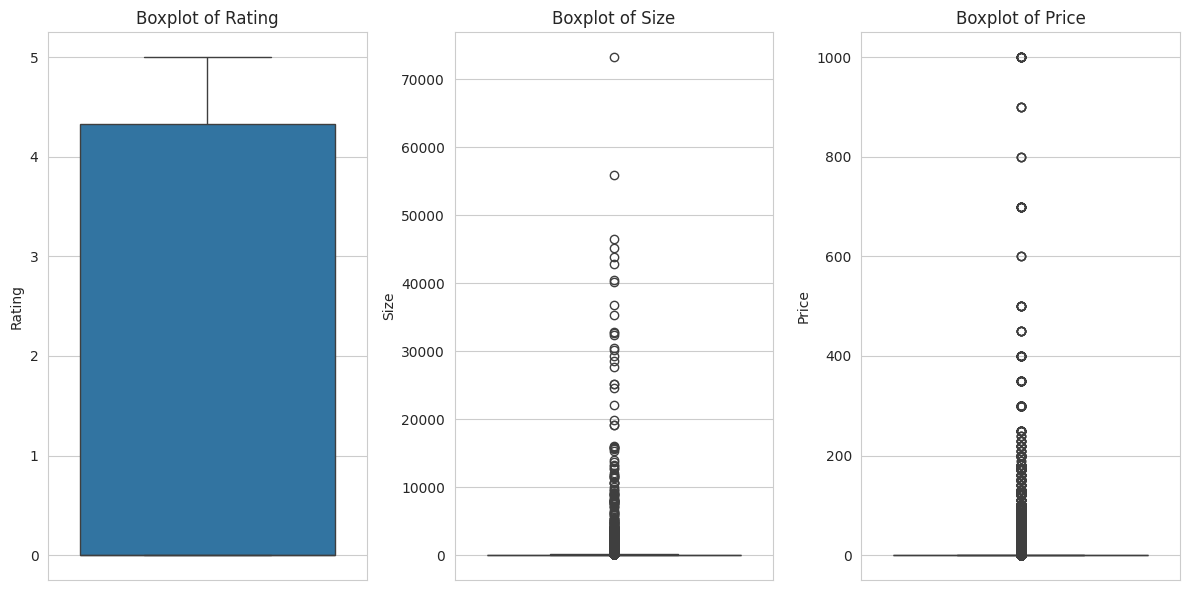

In [ ]:
# Define columns to check for outliers
columns_to_check = ['Rating', 'Size', 'Price']

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplots
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, index i
    sns.boxplot(y=apple_df3[col])
    plt.title(f'Boxplot of {col}')

# Show the plot
plt.tight_layout()
plt.show()

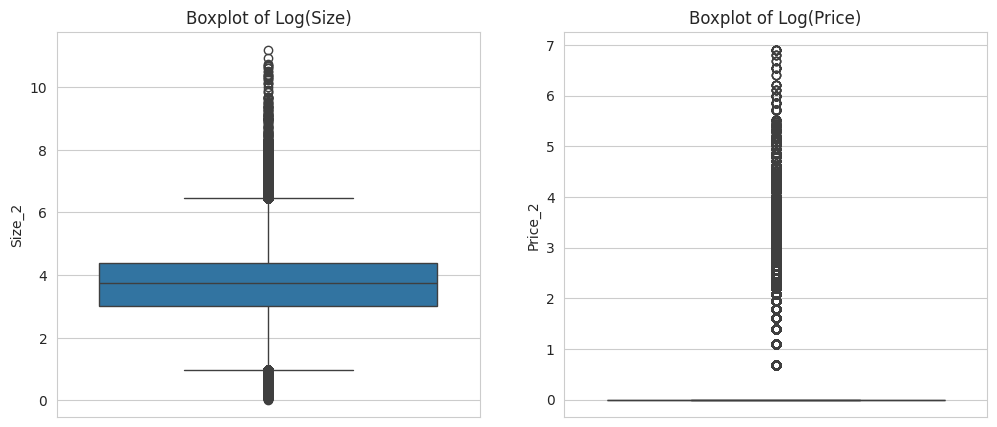

In [ ]:
#log tranformation
# Avoid log(0) by adding 1
apple_df3['Size_2'] = np.log1p(apple_df3['Size'])
apple_df3['Price_2'] = np.log1p(apple_df3['Price'])

# Replot boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=apple_df3['Size_2'], ax=axes[0])
axes[0].set_title('Boxplot of Log(Size)')

sns.boxplot(y=apple_df3['Price_2'], ax=axes[1])
axes[1].set_title('Boxplot of Log(Price)')

plt.show()

In [ ]:
apple_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229885 entries, 0 to 1230375
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   App Id    1229885 non-null  object 
 1   App Name  1229885 non-null  object 
 2   Category  1229885 non-null  object 
 3   Rating    1229885 non-null  float64
 4   Size      1229885 non-null  float64
 5   Price     1229885 non-null  float64
 6   Free      1229885 non-null  bool   
 7   Size_2    1229885 non-null  float64
 8   Price_2   1229885 non-null  float64
dtypes: bool(1), float64(5), object(3)
memory usage: 85.6+ MB


In [ ]:
# Compare average ratings
google_avg_rating = df1["Rating"].mean()
apple_avg_rating = apple_df3["Rating"].mean()

print(f"Average Rating - Google Play: {google_avg_rating:.2f}")
print(f"Average Rating - Apple Store: {apple_avg_rating:.2f}")

# Compare average prices
google_avg_price = df1["Price"].mean()
apple_avg_price = apple_df3["Price"].mean()

print(f"Average Price - Google Play: ${google_avg_price:.2f}")
print(f"Average Price - Apple Store: ${apple_avg_price:.2f}")

Average Rating - Google Play: 2.18
Average Rating - Apple Store: 1.79
Average Price - Google Play: $0.10
Average Price - Apple Store: $0.50


**KPIs**

In [ ]:
#avg rating per platform
avg_rating_google = df1["Rating"].mean()
avg_rating_apple = apple_df3["Rating"].mean()

print(f"Google Play Average Rating: {avg_rating_google:.2f}")
print(f"Apple Store Average Rating: {avg_rating_apple:.2f}")

Google Play Average Rating: 2.18
Apple Store Average Rating: 1.79


In [ ]:
#total number of apps per platform
num_apps_google = df1.shape[0]
num_apps_apple = apple_df3.shape[0]

print(f"Total Apps on Google Play: {num_apps_google}")
print(f"Total Apps on Apple Store: {num_apps_apple}")

Total Apps on Google Play: 2312743
Total Apps on Apple Store: 1229885


In [ ]:
#Top 5 Most Common Categories
top_categories_google = df1["Category"].value_counts().head(5)
top_categories_apple = apple_df3["Category"].value_counts().head(5)

print("Top 5 Google Play Categories:\n", top_categories_google)
print("\nTop 5 Apple Store Categories:\n", top_categories_apple)

Top 5 Google Play Categories:
 Category
Education        241076
Music & Audio    154899
Tools            143976
Business         143761
Entertainment    138266
Name: count, dtype: int64

Top 5 Apple Store Categories:
 Category
Games        193328
Business     128296
Education    119168
Utilities     94003
Lifestyle     84562
Name: count, dtype: int64


In [ ]:
#Average Number of Ratings per Category
avg_ratings_per_category_google = df1.groupby("Category")["Rating"].mean().sort_values(ascending=False)
avg_ratings_per_category_apple = apple_df3.groupby("Category")["Rating"].mean().sort_values(ascending=False)

print("Google Play - top 5 Avg Ratings per Category:\n", avg_ratings_per_category_google.head(5))
print("\nApple Store - top 5 Avg Ratings per Category:\n", avg_ratings_per_category_apple.head(5))

Google Play - top 5 Avg Ratings per Category:
 Category
Role Playing    3.257984
Casino          3.253191
Simulation      3.134605
Weather         3.070766
Card            3.034992
Name: Rating, dtype: float64

Apple Store - top 5 Avg Ratings per Category:
 Category
Weather          2.594045
Games            2.557332
Photo & Video    2.306259
Music            2.253994
Book             2.182049
Name: Rating, dtype: float64


In [ ]:
#Percentage of Free vs. Paid Apps
free_apps_google = df1[df1["Price"] == 0].shape[0]
paid_apps_google = df1[df1["Price"] > 0].shape[0]
free_percentage_google = (free_apps_google / num_apps_google) * 100

free_apps_apple = apple_df3[apple_df3["Price"] == 0].shape[0]
paid_apps_apple = apple_df3[apple_df3["Price"] > 0].shape[0]
free_percentage_apple = (free_apps_apple / num_apps_apple) * 100

print(f"Google Play - Free Apps: {free_percentage_google:.2f}%")
print(f"Apple Store - Free Apps: {free_percentage_apple:.2f}%")

Google Play - Free Apps: 98.06%
Apple Store - Free Apps: 91.67%


In [ ]:
#Revenue Potential Index (Estimated Revenue = Price × Number of Ratings)
df1["Estimated_Revenue"] = df1["Price"] * df1["Rating"]
apple_df3["Estimated_Revenue"] = apple_df3["Price"] * apple_df3["Rating"]

top_revenue_google = df1.nlargest(5, "Estimated_Revenue")
top_revenue_apple = apple_df3.nlargest(5, "Estimated_Revenue")

print("Top 5 Revenue Potential Apps (Google Play):\n", top_revenue_google[["App Name", "Estimated_Revenue"]])
print("\nTop 5 Revenue Potential Apps (Apple Store):\n", top_revenue_apple[["App Name", "Estimated_Revenue"]])

Top 5 Revenue Potential Apps (Google Play):
                                               App Name  Estimated_Revenue
644212               Challenge Impossible Ball for you           1999.950
1821265                Auto File Transfer (deprecated)           1698.457
1638663                                 Точки интереса           1639.959
2085590                   Series Addict Pro - TV Guide           1639.959
567747   Movies App - Latest, Upcoming, Popular Movies           1561.956

Top 5 Revenue Potential Apps (Apple Store):
                       App Name  Estimated_Revenue
444122                RP.MEDIA        4999.950000
935957              CyberTuner        4840.861591
412439        Archipad Classic        2999.950000
935745               Verituner        2999.950000
224384  CHEQR PRO DataBar Tool        2249.950000


In [ ]:
#Top 10 Apps with the Highest Ratings
top_rated_google = df1.nlargest(10, "Rating")[["App Name", "Rating"]]
top_rated_apple = apple_df3.nlargest(10, "Rating")[["App Name", "Rating"]]

print("Top 10 Highest Rated Google Play Apps:\n", top_rated_google)
print("\nTop 10 Highest Rated Apple Store Apps:\n", top_rated_apple)

Top 10 Highest Rated Google Play Apps:
                                               App Name  Rating
3    Smart City Trichy Public Service Vehicles 17UC...     5.0
17                             All in one shopping app     5.0
42                            Niagara Falls Wallpapers     5.0
43                                     Extrude Balance     5.0
72                                Triple Point Academy     5.0
116                                             ignite     5.0
123                             KNOWLEDGE FLOW CLASSES     5.0
131                              Let's Fact? Let's Go!     5.0
169                                  San Jose Gurdwara     5.0
188                                          SensorLab     5.0

Top 10 Highest Rated Apple Store Apps:
                                     App Name  Rating
1                                    A-Books     5.0
20  Aaabc Vui Lite - Bang chu cai tieng viet     5.0
21             AAA³ Little Ponies & Unicorns     5.0
24            

In [ ]:
#App Categories with the Highest Engagement
engagement_google = df1.groupby("Category")["Rating"].count().nlargest(5)
engagement_apple = apple_df3.groupby("Category")["Rating"].count().nlargest(5)

print("Top 5 Engaged Categories (Google Play):\n", engagement_google)
print("\nTop 5 Engaged Categories (Apple Store):\n", engagement_apple)

Top 5 Engaged Categories (Google Play):
 Category
Education        241076
Music & Audio    154899
Tools            143976
Business         143761
Entertainment    138266
Name: Rating, dtype: int64

Top 5 Engaged Categories (Apple Store):
 Category
Games        193328
Business     128296
Education    119168
Utilities     94003
Lifestyle     84562
Name: Rating, dtype: int64


In [ ]:
#Rating-to-Price Ratio (Are higher-priced apps rated better?)
# Create a new column indicating whether the app is free or paid
# Ensure 'Price' column is numeric
df1["Price"] = pd.to_numeric(df1["Price"], errors="coerce")
apple_df3["Price"] = pd.to_numeric(apple_df3["Price"], errors="coerce")

# Calculate Rating-to-Price Ratio (Avoid division by zero for free apps)
df1["Rating_to_Price"] = df1.apply(lambda row: row["Rating"] / (row["Price"] + 1) if not row["Free"] else row["Rating"], axis=1)
apple_df3["Rating_to_Price"] = apple_df3.apply(lambda row: row["Rating"] / (row["Price"] + 1) if not row["Free"] else row["Rating"], axis=1)

# Get the Top 5 Apps with Best Rating-to-Price Ratio
highest_rtp_google = df1.nlargest(5, "Rating_to_Price")[["App Name", "Rating", "Price", "Free", "Rating_to_Price"]]
highest_rtp_apple = apple_df3.nlargest(5, "Rating_to_Price")[["App Name", "Rating", "Price", "Free", "Rating_to_Price"]]

print("Top 5 Apps with Best Rating-to-Price Ratio (Google Play):\n", highest_rtp_google)
print("\nTop 5 Apps with Best Rating-to-Price Ratio (Apple Store):\n", highest_rtp_apple)

# FINAL DATASETS

In [ ]:
#Google
df1.head()

In [ ]:
# Remove rows where Size contains 'Varies with device'
df1 = df1.loc[df1['Size'] != 'Varies with device']

df1.drop(df1[df1['Size'] == 'Varies with device'].index, inplace=True)

In [ ]:
df1.head()

In [ ]:
# Step 2: Duplicate the column and name it Size_unit
df1['Size_unit'] = df1['Size']

# Step 3: Strip commas and remove M, k, or G from the Size column
df1['Size'] = df1['Size'].str.replace(',', '').str.replace(r'[MkG]', '', regex=True)

# Step 4: Convert Size column to float
df1['Size'] = df1['Size'].astype(float)

# Step 5: Convert k (Kilobytes) to M (Megabytes) and G (Gigabytes) to M (Megabytes)
df1.loc[df1['Size_unit'].str.contains('k', na=False), 'Size'] /= 1000  # Convert KB to MB
df1.loc[df1['Size_unit'].str.contains('G', na=False), 'Size'] *= 1000  # Convert GB to MB

In [ ]:
df1.info()

In [ ]:
df1.head()

# PREDICTION

#### INSTALL GROWTH PREDICTION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assume your df1 is loaded into a df1Frame called 'df1'
# Example:
# df1 = pd.read_csv("your_df1.csv")

# Define features and target
features = ["Category", "Rating", "Rating Count", "Editors Choice", "Free",
            "Price", "Ad Supported", "In App Purchases", "Size"]
target = "Max_Installs_2"

# Split the dataset into input (X) and output (y)
X = df1[features]
y = df1[target]

# Define which features are categorical and which are numeric
categorical_features = ["Category", "Editors Choice", "Free", "Ad Supported", "In App Purchases"]
numeric_features = ["Rating", "Rating Count", "Price", "Size"]

# Create a ColumnTransformer for preprocessing:
# - StandardScaler for numeric features
# - OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the preprocessor on training df1 and transform both training and test df1
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Determine the input dimension (number of features after transformation)
input_dim = X_train_processed.shape[1]

# Define a function to create the neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Create the model
model = create_model(input_dim)

# Set up EarlyStopping to halt training when validation loss stops improving
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_processed, y_test, verbose=1)
print("Test Loss:", loss)
print("Test MAE:", mae)


Epoch 1/20
44760/44760 ━━━━━━━━━━━━━━━━━━━━ 269s 6ms/step - loss: 4.2973 - mean_absolute_error: 1.6007 - val_loss: 2.5552 - val_mean_absolute_error: 1.2565
Epoch 2/20
44760/44760 ━━━━━━━━━━━━━━━━━━━━ 324s 6ms/step - loss: 2.7502 - mean_absolute_error: 1.2846 - val_loss: 2.6490 - val_mean_absolute_error: 1.2095
Epoch 3/20
44760/44760 ━━━━━━━━━━━━━━━━━━━━ 260s 6ms/step - loss: 2.6386 - mean_absolute_error: 1.2462 - val_loss: 2.4203 - val_mean_absolute_error: 1.2000
Epoch 4/20
44760/44760 ━━━━━━━━━━━━━━━━━━━━ 255s 6ms/step - loss: 2.6927 - mean_absolute_error: 1.2302 - val_loss: 2.4133 - val_mean_absolute_error: 1.2027
Epoch 5/20
44760/44760 ━━━━━━━━━━━━━━━━━━━━ 262s 6ms/step - loss: 2.6578 - mean_absolute_error: 1.2204 - val_loss: 2.4021 - val_mean_absolute_error: 1.1824
Epoch 6/20
44760/44760 ━━━━━━━━━━━━━━━━━━━━ 270s 6ms/step - loss: 2.4516 - mean_absolute_error: 1.2084 - val_loss: 2.4540 - val_mean_absolute_error: 1.2090
Epoch 7/20
44760/44760 ━━━━━━━━━━━━━━━━━━━━ 307s 6ms/step - loss

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.impute import SimpleImputer

# # Drop rows where the target is missing
# df1 = df1.dropna(subset=["Maximum Installs"])

# # Define features and target with log transformation for the target
# features = ["Category", "Rating", "Rating Count", "Editors Choice", "Free",
#             "Price", "Ad Supported", "In App Purchases", "Size"]
# target = "Maximum Installs"

# X = df1[features]
# y = np.log1p(df1[target])  # Log-transform the target to handle skewness

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Preprocessing steps
# def preprocess_features(X_train, X_test):
#     # Convert binary columns to 0/1
#     binary_cols = ['Editors Choice', 'Free', 'Ad Supported', 'In App Purchases']
#     for col in binary_cols:
#         X_train[col] = X_train[col].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
#         X_test[col] = X_test[col].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)

#     # Impute numerical features with median
#     num_cols = ['Rating', 'Rating Count', 'Price', 'Size']
#     num_imputer = SimpleImputer(strategy='median')
#     X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
#     X_test[num_cols] = num_imputer.transform(X_test[num_cols])

#     # Fix category imputation by flattening 2D array to 1D
#     cat_imputer = SimpleImputer(strategy='most_frequent')
#     X_train['Category'] = cat_imputer.fit_transform(X_train[['Category']]).ravel()
#     X_test['Category'] = cat_imputer.transform(X_test[['Category']]).ravel()

#     # One-hot encoding
#     X_train = pd.get_dummies(X_train, columns=['Category'], drop_first=True)
#     X_test = pd.get_dummies(X_test, columns=['Category'], drop_first=True)

#     # Align columns
#     X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#     return X_train, X_test

# X_train, X_test = preprocess_features(X_train, X_test)

# # Hyperparameter tuning with GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# rf = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_

# # Predictions and evaluation on the original scale
# y_pred = best_model.predict(X_test)
# y_test_exp = np.expm1(y_test)  # Exponentiate to reverse log transformation
# y_pred_exp = np.expm1(y_pred)

# mse = mean_squared_error(y_test_exp, y_pred_exp)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test_exp, y_pred_exp)

# print("Optimized Model Performance:")
# print(f"Mean Squared Error: {mse}")
# print(f"Root Mean Squared Error: {rmse}")
# print(f"R-squared: {r2}")

# # Feature importances analysis
# feature_importances = best_model.feature_importances_
# importance_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# print("\nTop 10 Important Features:")
# print(importance_df.head(10))

In [ ]:
# # prompt: Create a predictive model. Use
# # select the features and target as
# # features = ["Category", "Rating", "Rating Count", "Editors Choice", "Free", "Price", "Ad Supported", "In App Purchases", "Size"]
# # target = "Maximum Installs"
# # # Define X (features) and y (target)
# # X = df1[features]
# # y = df1[target]

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Select features and target
# features = ["Category", "Rating", "Rating Count", "Editors Choice", "Free", "Price", "Ad Supported", "In App Purchases", "Size"]
# target = "Maximum Installs"

# # Define X (features) and y (target)
# X = df1[features]
# y = df1[target]

# # Convert categorical features to numerical using one-hot encoding
# X = pd.get_dummies(X, columns=['Category'], drop_first=True)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train a RandomForestRegressor model
# model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_squared_error, r2_score

# # Select relevant features
# features = ["Category", "Rating", "Rating Count", "Editors Choice", "Free", "Price", "Ad Supported", "In App Purchases", "Size"]
# target = "Maximum Installs"

# # Encode categorical features
# label_encoders = {}
# categorical_features = ["Category", "Editors Choice"]

# for col in categorical_features:
#     le = LabelEncoder()
#     df1[col] = le.fit_transform(df1[col])
#     label_encoders[col] = le  # Save encoders for future use

# # Define X (features) and y (target)
# X = df1[features]
# y = df1[target]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train Random Forest Regressor
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluate model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R² Score: {r2}")

# # Add Predictions to Dataset
# df1["Predicted_Installs"] = model.predict(X)

# EXPPORT FILES

In [ ]:
export_features_google = ['App Id', 'App Name', 'Category', 'Rating', 'Rating Count',
       'Maximum Installs', 'Last Updated', 'Editors Choice', 'Content Rating',
       'Free', 'Price', 'Ad Supported', 'In App Purchases', 'Released', 'Size']

In [ ]:
# final google data
final_google_data = df1[export_features_google]

In [ ]:
# Export google data
final_google_data.to_csv('final_google_data.csv', index=False)

In [ ]:
# final apple data
final_apple_data = apple_df3

In [ ]:
# Export apple data
final_apple_data.to_csv('final_apple_data.csv', index=False)